# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


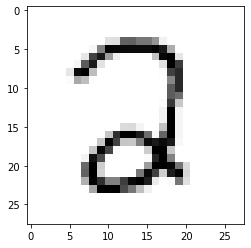

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2381
Training Accuracy: 0.6661, Testing Accuracy: 0.6673



Epoch 10, Loss 0.0974
Training Accuracy: 0.9171, Testing Accuracy: 0.9259



Epoch 20, Loss 0.0588
Training Accuracy: 0.9417, Testing Accuracy: 0.9506



Epoch 30, Loss 0.0455
Training Accuracy: 0.9517, Testing Accuracy: 0.9602



Epoch 40, Loss 0.0392
Training Accuracy: 0.9564, Testing Accuracy: 0.9652



Epoch 50, Loss 0.0354
Training Accuracy: 0.9589, Testing Accuracy: 0.9677



Epoch 60, Loss 0.0328
Training Accuracy: 0.9616, Testing Accuracy: 0.9693



Epoch 70, Loss 0.0308
Training Accuracy: 0.9639, Testing Accuracy: 0.9713



Epoch 80, Loss 0.0292
Training Accuracy: 0.9663, Testing Accuracy: 0.9713



Epoch 90, Loss 0.0279
Training Accuracy: 0.9682, Testing Accuracy: 0.9708



Epoch 100, Loss 0.0268
Training Accuracy: 0.9696, Testing Accuracy: 0.9713



Epoch 110, Loss 0.0258
Training Accuracy: 0.9708, Testing Accuracy: 0.9713



Epoch 120, Loss 0.025
Training Accuracy: 0.9720, Testing Accuracy: 0.9718



Epoch 130, Loss 0.0242
Training Accuracy: 0.9734, Testing Accuracy: 0.9723



Epoch 140, Loss 0.0235
Training Accuracy: 0.9743, Testing Accuracy: 0.9728



Epoch 150, Loss 0.0229
Training Accuracy: 0.9755, Testing Accuracy: 0.9733



Epoch 160, Loss 0.0223
Training Accuracy: 0.9753, Testing Accuracy: 0.9753



Epoch 170, Loss 0.0218
Training Accuracy: 0.9762, Testing Accuracy: 0.9753



Epoch 180, Loss 0.0212
Training Accuracy: 0.9765, Testing Accuracy: 0.9748



Epoch 190, Loss 0.0208
Training Accuracy: 0.9770, Testing Accuracy: 0.9758



Epoch 200, Loss 0.0203
Training Accuracy: 0.9775, Testing Accuracy: 0.9753



Epoch 210, Loss 0.0199
Training Accuracy: 0.9778, Testing Accuracy: 0.9753



Epoch 220, Loss 0.0195
Training Accuracy: 0.9783, Testing Accuracy: 0.9748



Epoch 230, Loss 0.0191
Training Accuracy: 0.9787, Testing Accuracy: 0.9753



Epoch 240, Loss 0.0188
Training Accuracy: 0.9791, Testing Accuracy: 0.9748



0.0017270734118920677

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.212
Training Accuracy: 0.7770, Testing Accuracy: 0.7676



Epoch 10, Loss 0.1019
Training Accuracy: 0.9080, Testing Accuracy: 0.9168



Epoch 20, Loss 0.0793
Training Accuracy: 0.9253, Testing Accuracy: 0.9350



Epoch 30, Loss 0.0686
Training Accuracy: 0.9346, Testing Accuracy: 0.9456



Epoch 40, Loss 0.062
Training Accuracy: 0.9402, Testing Accuracy: 0.9526



Epoch 50, Loss 0.0576
Training Accuracy: 0.9426, Testing Accuracy: 0.9551



Epoch 60, Loss 0.0543
Training Accuracy: 0.9458, Testing Accuracy: 0.9577



Epoch 70, Loss 0.0517
Training Accuracy: 0.9476, Testing Accuracy: 0.9577



Epoch 80, Loss 0.0496
Training Accuracy: 0.9492, Testing Accuracy: 0.9592



Epoch 90, Loss 0.048
Training Accuracy: 0.9505, Testing Accuracy: 0.9607



Epoch 100, Loss 0.0465
Training Accuracy: 0.9521, Testing Accuracy: 0.9602



Epoch 110, Loss 0.0453
Training Accuracy: 0.9531, Testing Accuracy: 0.9607



Epoch 120, Loss 0.0442
Training Accuracy: 0.9537, Testing Accuracy: 0.9617



Epoch 130, Loss 0.0433
Training Accuracy: 0.9548, Testing Accuracy: 0.9622



Epoch 140, Loss 0.0425
Training Accuracy: 0.9558, Testing Accuracy: 0.9627



Epoch 150, Loss 0.0417
Training Accuracy: 0.9561, Testing Accuracy: 0.9632



Epoch 160, Loss 0.041
Training Accuracy: 0.9566, Testing Accuracy: 0.9647



Epoch 170, Loss 0.0404
Training Accuracy: 0.9578, Testing Accuracy: 0.9647



Epoch 180, Loss 0.0398
Training Accuracy: 0.9585, Testing Accuracy: 0.9647



Epoch 190, Loss 0.0393
Training Accuracy: 0.9591, Testing Accuracy: 0.9662



Epoch 200, Loss 0.0388
Training Accuracy: 0.9595, Testing Accuracy: 0.9662



Epoch 210, Loss 0.0384
Training Accuracy: 0.9599, Testing Accuracy: 0.9667



Epoch 220, Loss 0.0379
Training Accuracy: 0.9603, Testing Accuracy: 0.9667



Epoch 230, Loss 0.0376
Training Accuracy: 0.9606, Testing Accuracy: 0.9667



Epoch 240, Loss 0.0372
Training Accuracy: 0.9610, Testing Accuracy: 0.9672



0.02238152390750849

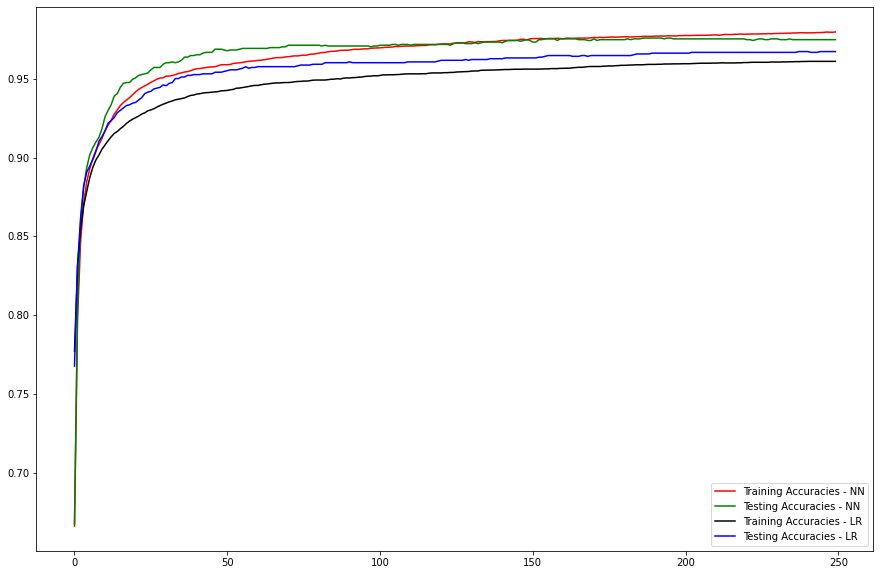

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

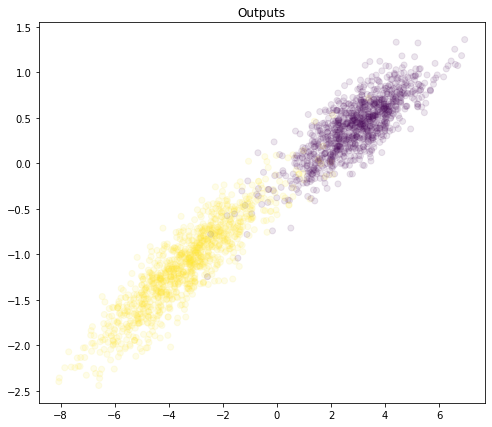

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

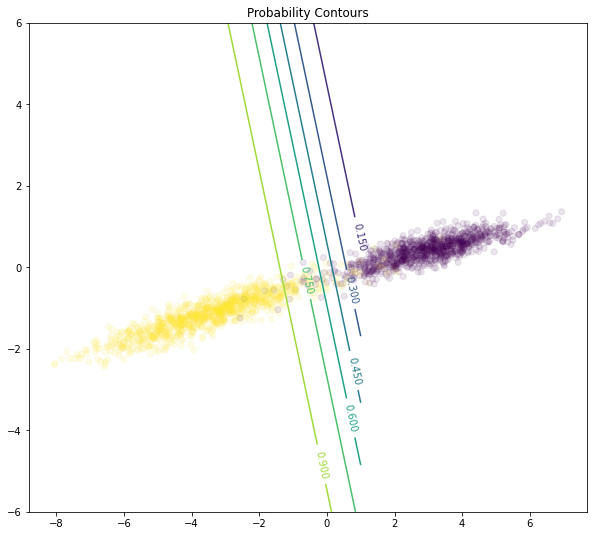

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );